Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Get the data

In [4]:
# Use raw string 
file_path = r"C:\Users\katta\OneDrive\Desktop\data science subjects\Data mining\project\adult-census-income.csv"

# Read the CSV file
adult_data = pd.read_csv(file_path)

# Display the dataframe
print(adult_data)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

Data exploration and visualization 

In [5]:
# Separate categorical and numerical columns
cat_col = adult_data.dtypes[adult_data.dtypes == 'object']
num_col = adult_data.dtypes[adult_data.dtypes != 'object']


In [6]:
# Iterate over categorical columns and print value counts and percentages
for col in cat_col.index:
    print(f"--------------------{col.title()}-------------------------")
    total = adult_data[col].value_counts()
    percent = adult_data[col].value_counts() / adult_data.shape[0]
    df = pd.concat([total, percent], keys=['total', 'percent'], axis=1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
workclass                        
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
education                    
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Pres

In [7]:
edit_cols = ['native.country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult_data.loc[adult_data[col] == '?', col] = 'unknown'

In [8]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_data[(adult_data[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [9]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
adult_data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

adult_data['education'].value_counts()

C:\Users\katta\AppData\Local\Temp\ipykernel_15628\1450519163.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)


education
HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: count, dtype: int64

In [10]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_data['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_data['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_data['marital.status'].value_counts()

C:\Users\katta\AppData\Local\Temp\ipykernel_15628\1296440233.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)


marital.status
Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: count, dtype: int64

In [11]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_data['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_data['workclass'].value_counts()

C:\Users\katta\AppData\Local\Temp\ipykernel_15628\3914066415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)


workclass
Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: count, dtype: int64

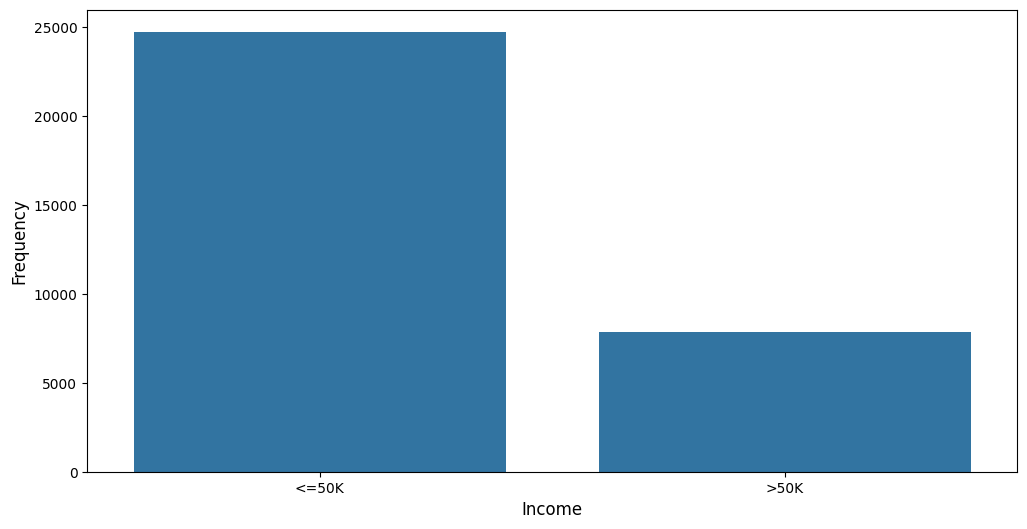

In [203]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);


In [12]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {adult_data[(adult_data['capital.loss'] == 0) & (adult_data['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"=========={col}==========")
    print(adult_data[(adult_data['capital.loss'] == 0) & (adult_data['capital.gain'] == 0)][col].value_counts())


Number of observations having capital gain and capital loss zero: (28330, 15)
==========workclass==========
workclass
Private           19982
Govt_employees     3714
Self_employed      2960
unknown            1655
Without-pay          12
Never-worked          7
Name: count, dtype: int64
==========education==========
education
HS-grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
elementary_school     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: count, dtype: int64
==========marital.status==========
marital.status
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: count, dtype: int64
==========occupation==========
occupation
Craft-repair         3593
Adm-clerical         3408
Prof-specialty       3290
Exec-managerial      3219
Sales                3138
Other-service        3122
Machine-op

In [13]:
#Let's find more about capital gain by excluding zero value.

adult_data.loc[adult_data['capital.gain'] > 0,:].describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [14]:
print(f"Number of observations having capital gain of 99999:{adult_data.loc[adult_data['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {adult_data.loc[adult_data['capital.gain'] == 99999,:]['income'].value_counts()}")


Number of observations having capital gain of 99999:(159, 15)
Income counts: income
>50K    159
Name: count, dtype: int64


In [15]:
adult_data.loc[adult_data['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [16]:
print(f"Number of observations having capital loss of 4356:{adult_data.loc[adult_data['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{adult_data.loc[adult_data['capital.loss'] >= 1871,:]['income'].value_counts()}")


Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
income
>50K     658
<=50K    277
Name: count, dtype: int64


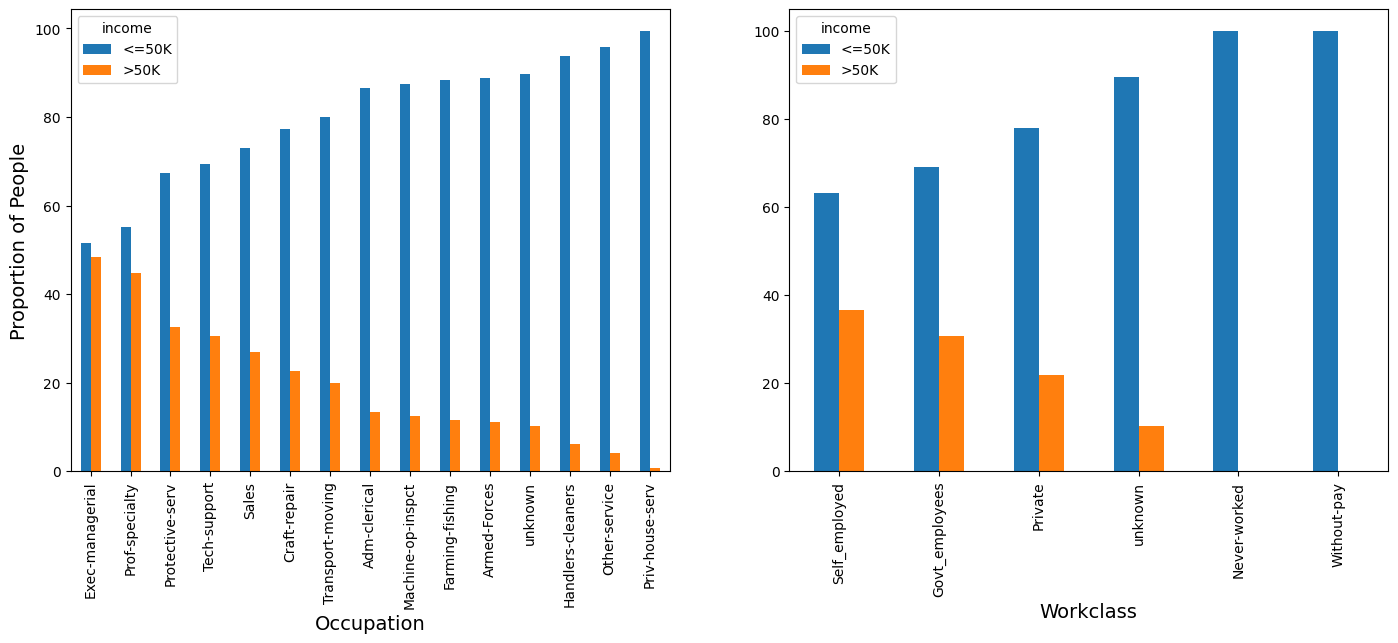

In [17]:
table_occu = pd.crosstab(adult_data['occupation'], adult_data['income'])
table_workclass = pd.crosstab(adult_data['workclass'], adult_data['income'])
table_edu = pd.crosstab(adult_data['education'], adult_data['income'])
table_marital = pd.crosstab(adult_data['marital.status'], adult_data['income'])
table_race = pd.crosstab(adult_data['race'], adult_data['income'])
table_sex = pd.crosstab(adult_data['sex'], adult_data['income'])
table_country = pd.crosstab(adult_data['native.country'], adult_data['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);



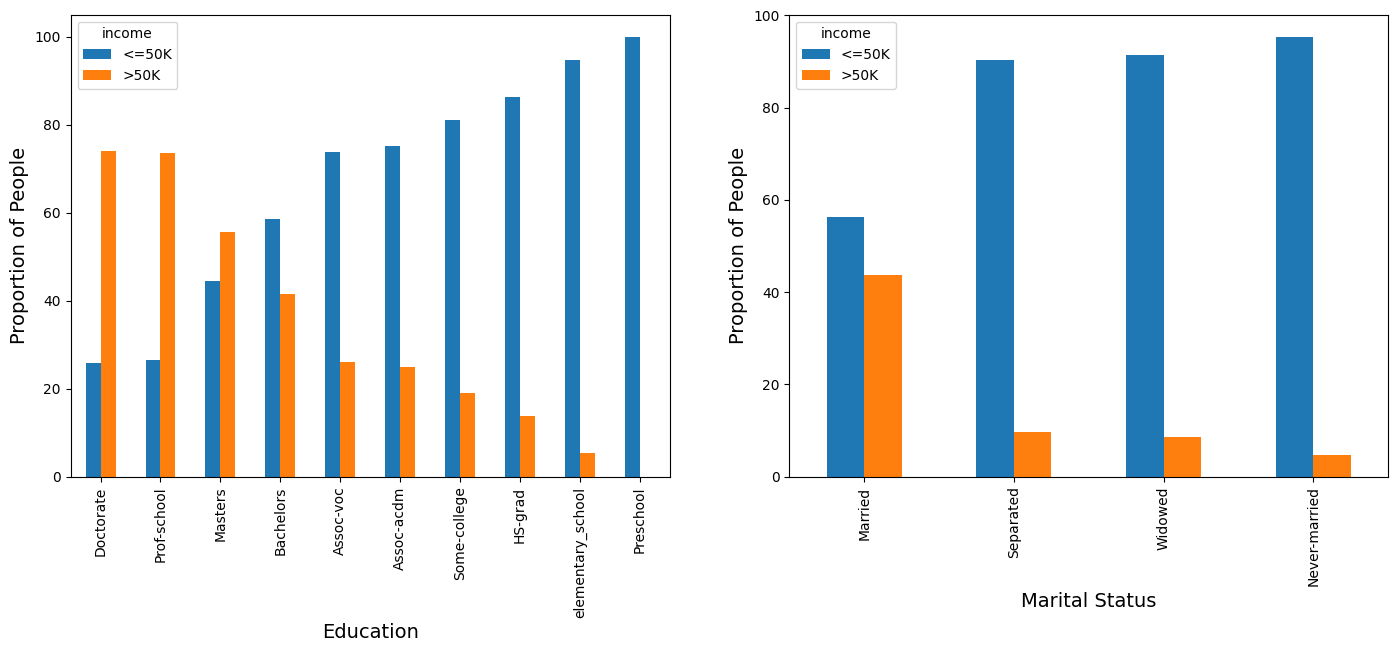

In [18]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);



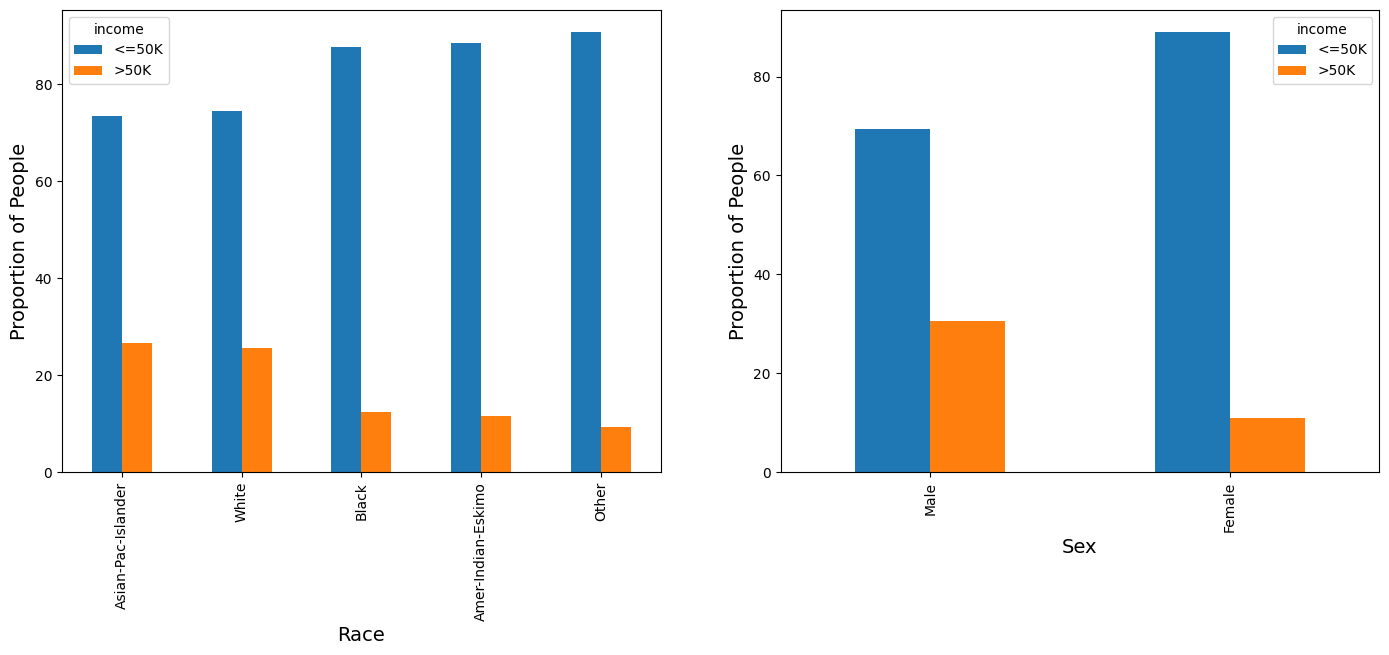

In [19]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


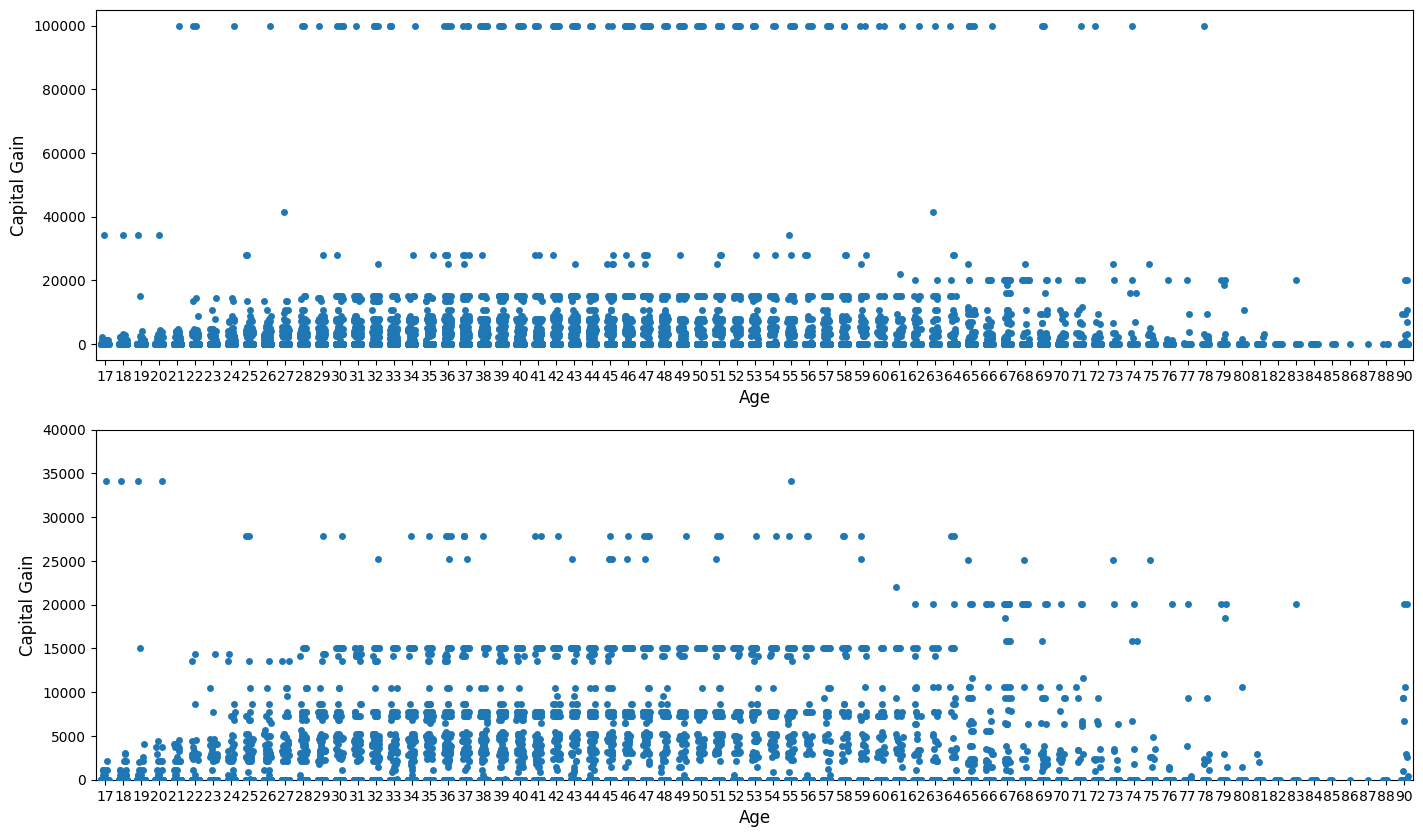

In [20]:
fig = plt.figure(figsize=(17, 10))

ax1 = fig.add_subplot(2, 1, 1)
sns.stripplot(x='age', y='capital.gain', data=adult_data, jitter=0.2, ax=ax1)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Capital Gain', fontsize=12)

ax2 = fig.add_subplot(2, 1, 2)
sns.stripplot(x='age', y='capital.gain', data=adult_data, jitter=0.2, ax=ax2)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Capital Gain', fontsize=12)
ax2.set_ylim(0, 40000)

plt.show()



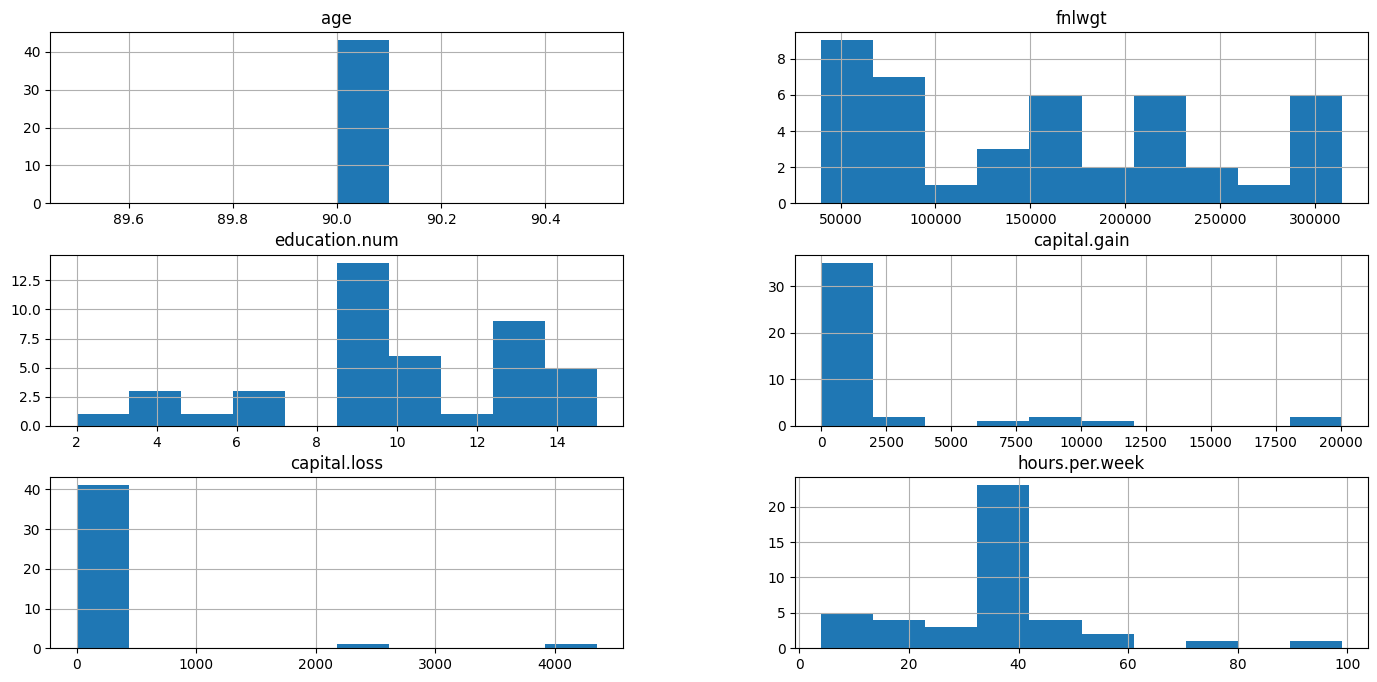

In [21]:
adult_data[adult_data['age'] == 90].hist(figsize = (17,8));

In [22]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"=========={col}=========")
        print(adult_data[adult_data['age'] == 90][col].value_counts())
    else:
        continue
   


==========workclass=========
workclass
Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: count, dtype: int64
==========occupation=========
occupation
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Sales                3
Craft-repair         3
Machine-op-inspct    3
Protective-serv      1
Handlers-cleaners    1
Farming-fishing      1
Transport-moving     1
Name: count, dtype: int64
==========income=========
income
<=50K    35
>50K      8
Name: count, dtype: int64


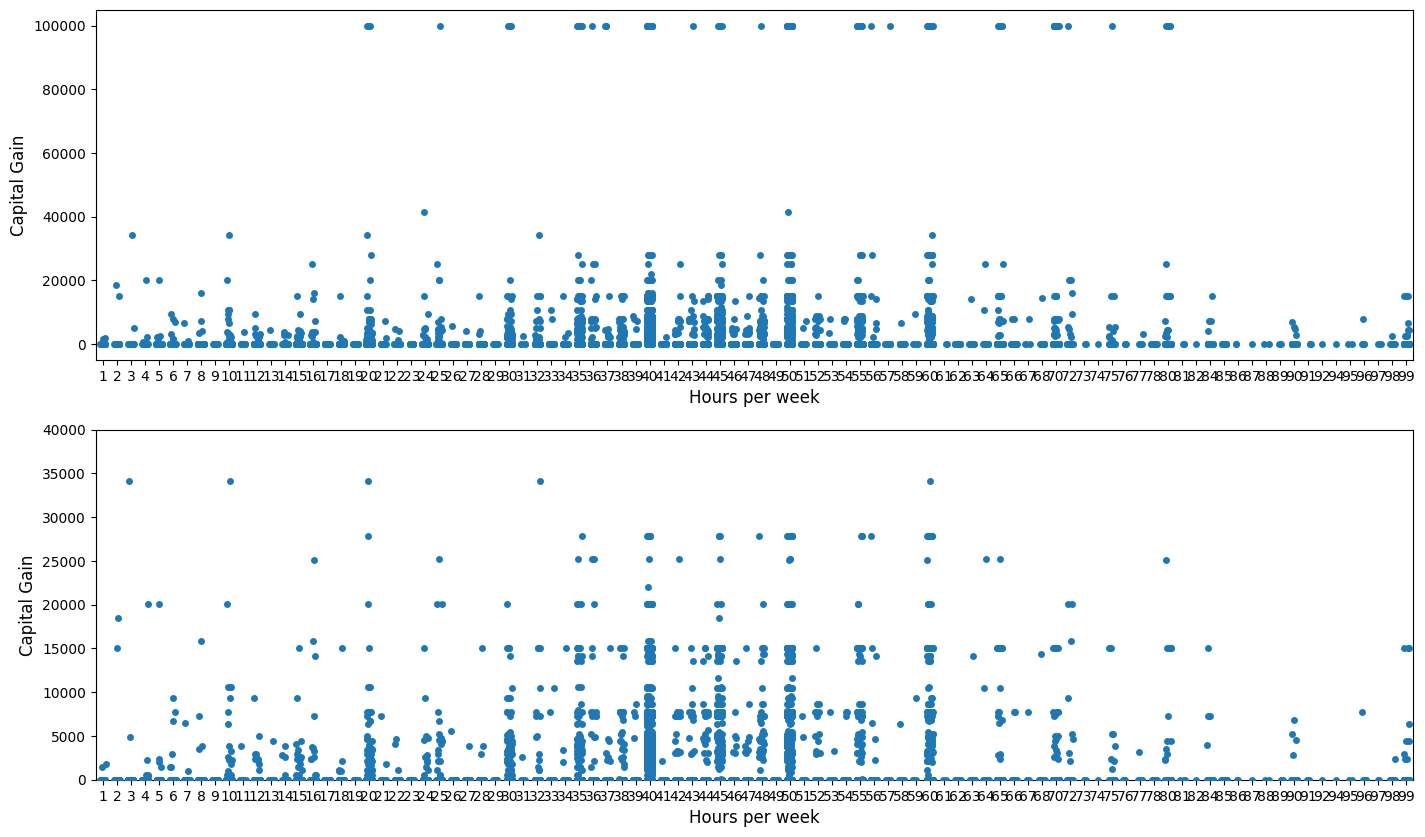

In [23]:
fig = plt.figure(figsize=(17, 10))

ax1 = fig.add_subplot(2, 1, 1)
sns.stripplot(x='hours.per.week', y='capital.gain', data=adult_data, jitter=0.2, ax=ax1)
ax1.set_xlabel('Hours per week', fontsize=12)
ax1.set_ylabel('Capital Gain', fontsize=12)

ax2 = fig.add_subplot(2, 1, 2)
sns.stripplot(x='hours.per.week', y='capital.gain', data=adult_data, jitter=0.2, ax=ax2)
ax2.set_xlabel('Hours per week', fontsize=12)
ax2.set_ylabel('Capital Gain', fontsize=12)
ax2.set_ylim(0, 40000)

plt.show()



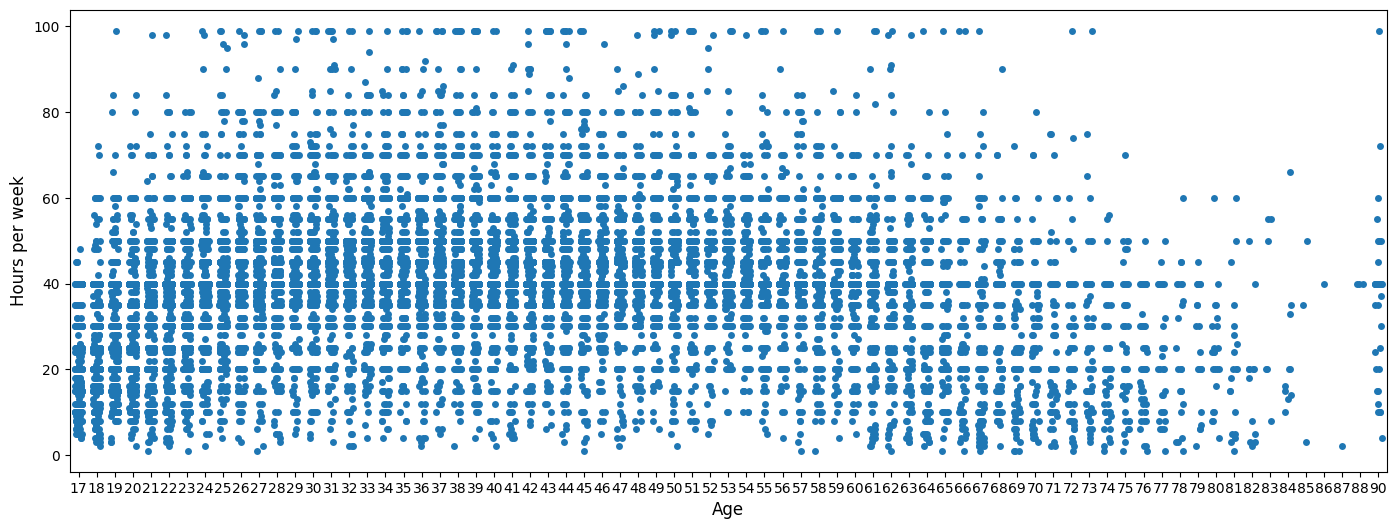

In [24]:
fig = plt.figure(figsize=(17, 6))

sns.stripplot(x='age', y='hours.per.week', data=adult_data, jitter=0.2)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Hours per week', fontsize=12)

plt.show()




Preparing data for Machine Learning Algorithms

In [25]:
print(f"Number of columns before deleting: {adult_data.shape[1]}")

del_cols = ['relationship','education.num']
adult_data.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_data.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [26]:
hrs_per_week = adult_data[adult_data['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 85


In [27]:
# drop rows with age 90
print("Number of observation before removing:",adult_data.shape)
index_age = adult_data[adult_data['age'] == 90].index
adult_data.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_data.shape)

Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [28]:
print("Number of observation before removing:",adult_data.shape)
index_gain = adult_data[adult_data['capital.gain'] == 99999].index
adult_data.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_data.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [29]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_data[num_col_new]),columns = num_col_new).head(3)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,0.915493,0.0,1.000000,0.173469,0.081896
1,0.690141,0.0,1.000000,0.397959,0.118021
2,0.521127,0.0,0.895317,0.397959,0.086982


In [31]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [32]:
num_df = pipeline.fit_transform(adult_data)
num_df.shape

(32359, 5)

In [33]:
# columns which I don't need after creating dummy variables dataframe
from sklearn.base import TransformerMixin
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [34]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_data)
cat_df.shape

(32359, 80)

In [35]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [36]:
final_data = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_data.shape}")
print(final_data)

Number of observations in final dataset: (32157, 86)
       education_Assoc-acdm  education_Assoc-voc  education_Bachelors  \
0                     False                False                False   
1                     False                False                False   
2                     False                False                False   
3                     False                False                False   
4                     False                False                False   
...                     ...                  ...                  ...   
32152                 False                False                False   
32153                 False                False                False   
32154                 False                False                False   
32155                 False                False                False   
32156                 False                False                False   

       education_Doctorate  education_HS-grad  education_Masters  \
0 

Training the model

In [37]:
y = final_data['income_<=50K']
final_data.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB


In [39]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine (SVM) Classifier Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Support Vector Machine (SVM) Classifier Accuracy: 0.8403296019900498
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.52      0.60      1507
        True       0.86      0.94      0.90      4925

    accuracy                           0.84      6432
   macro avg       0.79      0.73      0.75      6432
weighted avg       0.83      0.84      0.83      6432



In [41]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Accuracy: 0.8373756218905473
Classification Report:
              precision    recall  f1-score   support

       False       0.69      0.56      0.62      1507
        True       0.87      0.92      0.90      4925

    accuracy                           0.84      6432
   macro avg       0.78      0.74      0.76      6432
weighted avg       0.83      0.84      0.83      6432



In [42]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Classification Report:")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classifier Accuracy: 0.8566542288557214
Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.56      0.65      1507
        True       0.88      0.95      0.91      4925

    accuracy                           0.86      6432
   macro avg       0.82      0.75      0.78      6432
weighted avg       0.85      0.86      0.85      6432



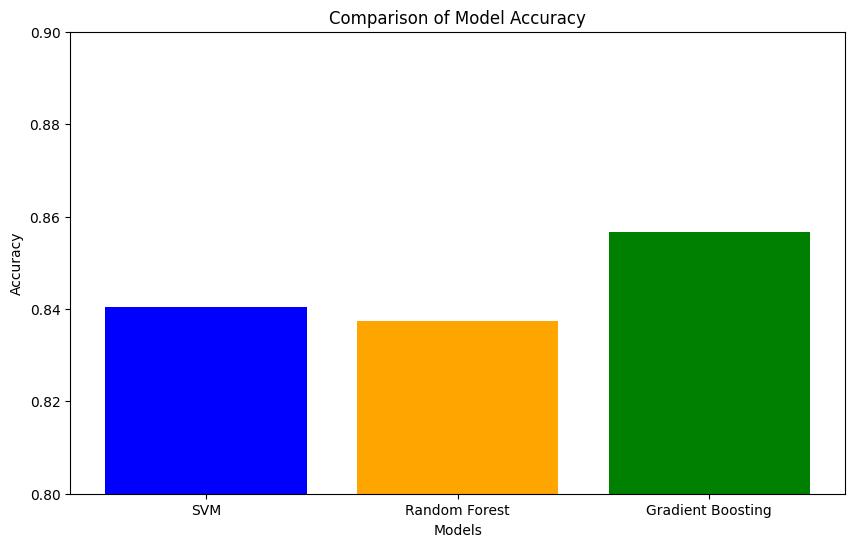

In [43]:
# Model names
models = ['SVM', 'Random Forest', 'Gradient Boosting']

# Accuracy scores
accuracy_scores = [svm_accuracy, rf_accuracy, gb_accuracy]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0.8, 0.9) 
plt.show()

In [44]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

def load_data():
    file_path = filedialog.askopenfilename()
    if file_path:
        adult_data = pd.read_csv(file_path)
        return adult_data
    else:
        return None

def preprocess_data(adult_data):
    # Convert categorical features to numerical using one-hot encoding
    adult_data = pd.get_dummies(adult_data, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'])
    return adult_data


def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_classifier.fit(X_train, y_train)
    gb_predictions = gb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, gb_predictions)
    report = classification_report(y_test, gb_predictions)
    return accuracy, report

def analyze_data():
    data = load_data()
    if data is not None:
        data = preprocess_data(data)
        X = data.drop(columns=['income'])
        y = data['income']
        accuracy, report = train_model(X, y)
        result_label.config(text=f"Accuracy: {accuracy}\n\nClassification Report:\n{report}")
    else:
        result_label.config(text="No file selected!")

# Create the main application window
root = tk.Tk()
root.title("Income Analysis GUI")

# Add a button to load and analyze data
load_button = ttk.Button(root, text="Load and Analyze Data", command=analyze_data)
load_button.pack(pady=10)

# Add a label to display the result
result_label = ttk.Label(root, text="")
result_label.pack(pady=10)

# Run the GUI application
root.mainloop()
